In [2]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import tensorflow as tf

import sys
sys.path.append('../')
import toolbox as tbx
from toolbox import RGBProfile as rgb
from environment import Environment

env = Environment()



2023-07-30 10:41:20.116983: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-30 10:41:23.306168: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


environment loaded


26


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


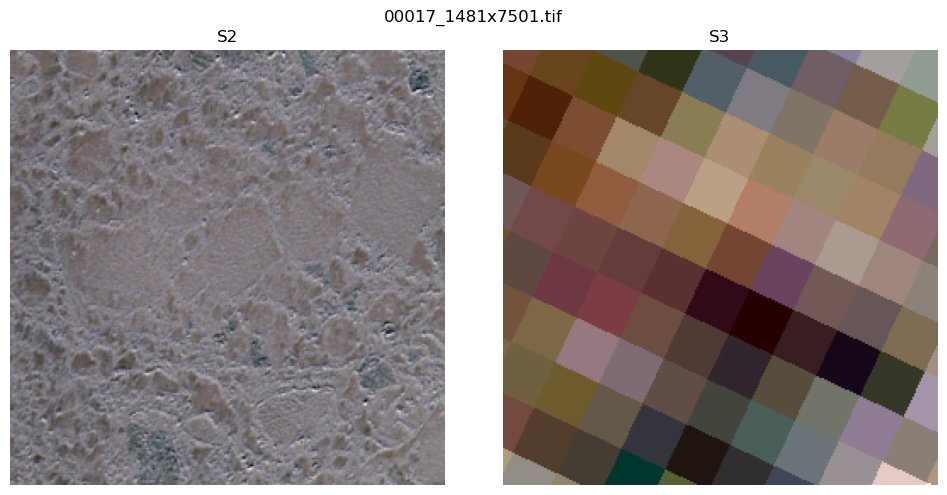

In [58]:
import random
import fnmatch

# TIF_DIR = os.path.join(env.DATA_ROOT, 'curated/256/tif/')
# TIF_DIR = os.path.join(env.DATA_ROOT, 'tif256')
# TIF_DIR = '/home/cb/sis2/data/curated/256/tif/'
TIF_DIR = os.path.join(env.DATA_ROOT, '_tif/inv_T17XNA_10h')

# TIF_FILENAME='/home/cb/sis2/data/tif256/00013_2883x1056.tif_tfcreated'
# TIF_FILENAME='/home/cb/sis2/data/tif256/00000_3927x1578.tif'
# TIF_FILENAME='/home/cb/sis2/data/tif960/00016_3014x7006.tifx.tif'
# TIF_FILENAME='/home/cb/sis2/data/tif960/00080_20x5010.tifx.tif'
# TIF_FILENAME='/home/cb/sis2/data/tif256/00271_9669x2622.tif'
TIF_FILENAME = random.choice(os.listdir(TIF_DIR))
files = [file for file in os.listdir(TIF_DIR) if not fnmatch.fnmatch(file, '*notinmask*')]
TIF_FILENAME = random.choice(files)


# raw_tiff = rasterio.open('/home/cb/sis2/data/temp4.tif')
# raw_tiff = rasterio.open('/home/cb/sis2/data/tif960/00012_1018x20.tif')
# raw_tiff = rasterio.open('/home/cb/sis2/data/tif256/00034_6798x534.tif')
raw_tiff = rasterio.open(os.path.join(TIF_DIR, TIF_FILENAME))
print(raw_tiff.count)
tbx.plot_tiff_sbs(raw_tiff, title=TIF_FILENAME)


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


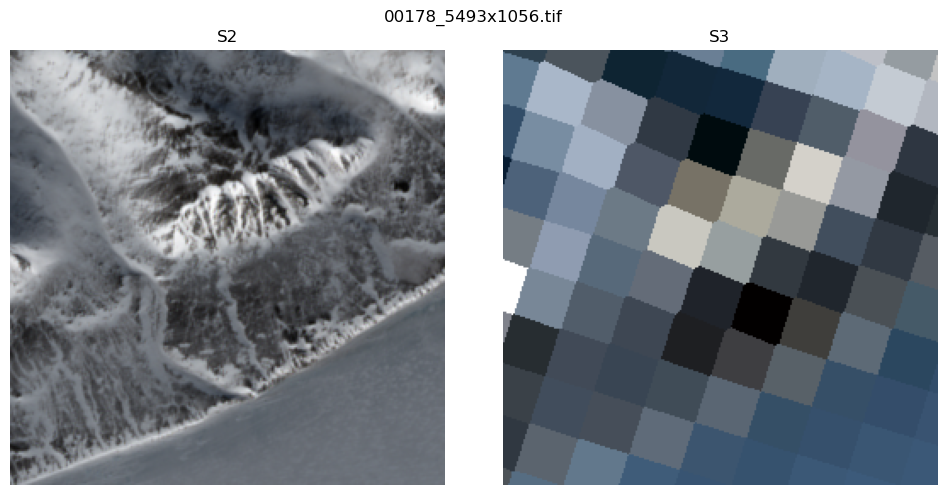

In [147]:
TIF_DIR = os.path.join('/home/cb/sis2/data/curated/256/tif/')

mid = '5493x1056'

curated_pairs = [34,
                 41,
                 47,
                 77,
                 81,
                 89,
                 103,
                 126,
                 141,
                 149,
                 170,
                 178,
                 264]

TIF_FILENAME = f'00178_{mid}.tif'
raw_tiff = rasterio.open(os.path.join(TIF_DIR, TIF_FILENAME))
tbx.plot_tiff_sbs(raw_tiff, title=TIF_FILENAME)


In [75]:
import random

DATASET = 'alt12mean'
TILESIZE = 256

# import importlib
# importlib.reload(tbx)

TENSOR_FILENAME = random.choice(os.listdir(os.path.join(env.DATA_ROOT, DATASET, str(TILESIZE), 'train')))
# TENSOR_FILEPATH = os.path.join(env.DATA_ROOT, DATASET, str(TILESIZE), 'train', TENSOR_FILENAME)
TENSOR_FILEPATH = '/home/cb/sis2/data/test.tfrecord'

sample_dataset = tf.data.TFRecordDataset(TENSOR_FILEPATH)
print(sample_dataset.enumerate())
for element in sample_dataset:
    print('y')
    tbx.plot_tensor_sbs_alt(element, TILESIZE, title=TENSOR_FILENAME)
    # s2_tensor, alt_tensor = tbx.parse_tfrecord_alt(element, init.TILESIZE)
    # tbx.plot_tensor(s2_tensor, rgb.S2)
    # tbx.plot_tensor(alt_tensor, rgb.S2)


<ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>


2023-07-30 13:19:24.207811: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


NotFoundError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} /home/cb/sis2/data/test.tfrecord; No such file or directory [Op:IteratorGetNext]

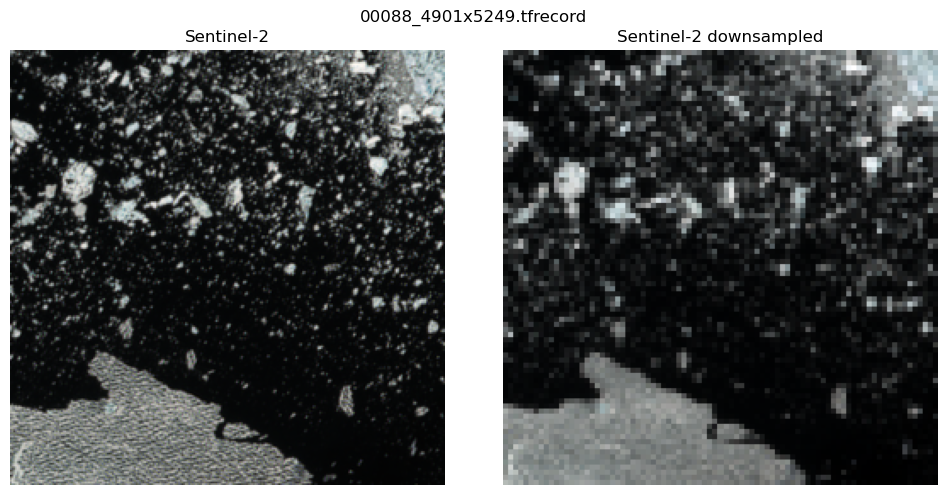

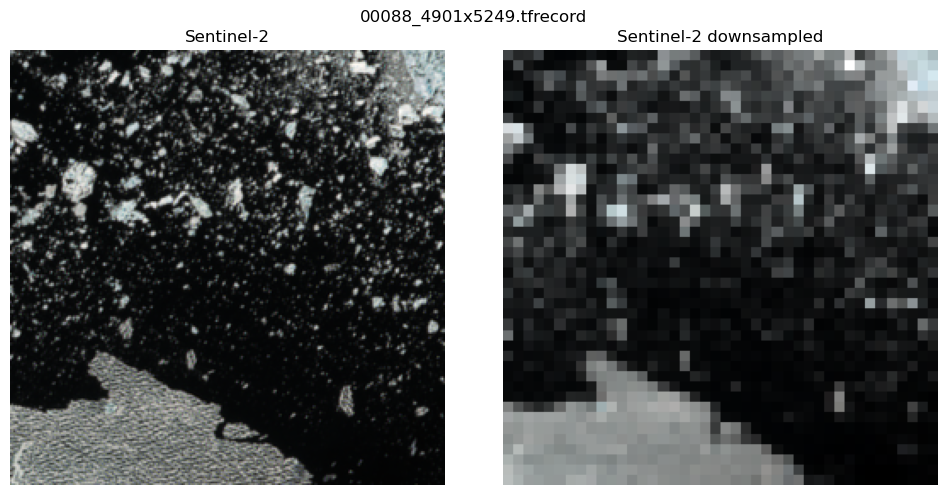

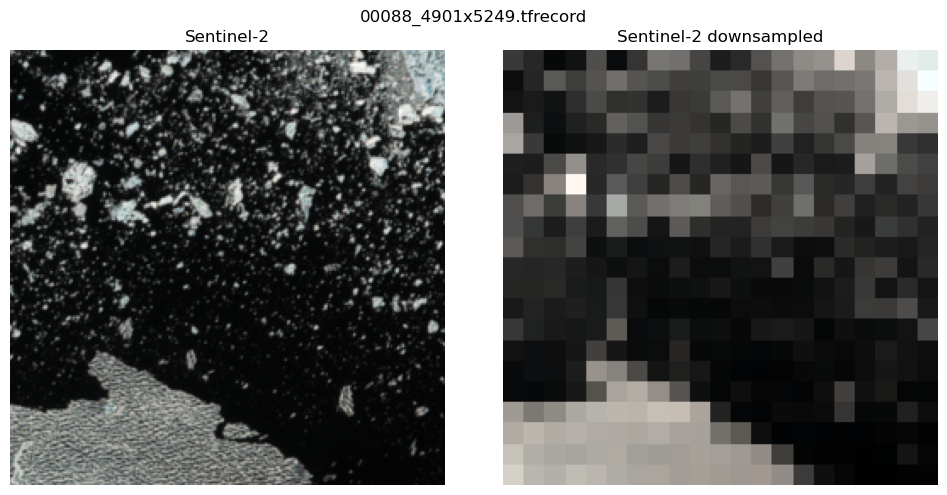

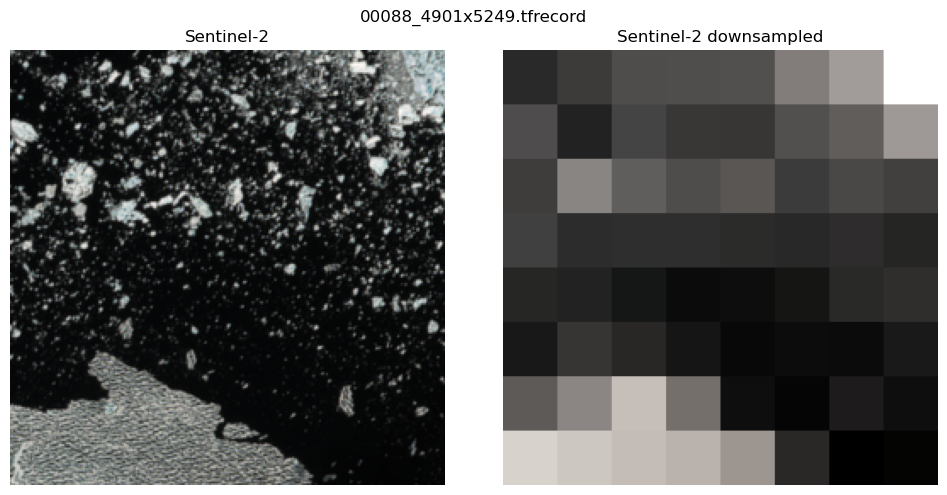

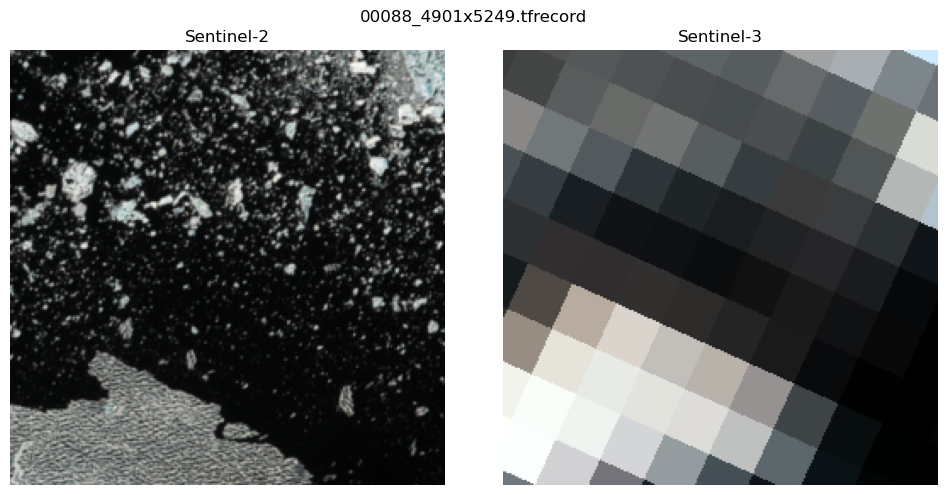

In [77]:
import random

# import importlib
# importlib.reload(tbx)

DATASET = 'masked'
TILESIZE = 256

TENSOR_FILENAME = random.choice(os.listdir(os.path.join(env.DATA_ROOT, f'cur_{DATASET}', str(TILESIZE), 'train')))

TENSOR_FILENAME_DOWN3 = os.path.join(env.DATA_ROOT, f'alt3_{DATASET}', str(TILESIZE), 'train', TENSOR_FILENAME)
TENSOR_FILENAME_DOWN6 = os.path.join(env.DATA_ROOT, f'alt6_{DATASET}', str(TILESIZE), 'train', TENSOR_FILENAME)
TENSOR_FILENAME_DOWN12 = os.path.join(env.DATA_ROOT, f'alt12_{DATASET}', str(TILESIZE), 'train', TENSOR_FILENAME)
TENSOR_FILENAME_DOWN30 = os.path.join(env.DATA_ROOT, f'alt30_{DATASET}', str(TILESIZE), 'train', TENSOR_FILENAME)
TENSOR_FILENAME_CLASSIC = os.path.join(env.DATA_ROOT, f'cur_{DATASET}', str(TILESIZE), 'train', TENSOR_FILENAME)

for sample_file in [TENSOR_FILENAME_DOWN3,TENSOR_FILENAME_DOWN6,TENSOR_FILENAME_DOWN12,TENSOR_FILENAME_DOWN30]:
    sample_dataset = tf.data.TFRecordDataset(sample_file)
    for element in sample_dataset:
        tbx.plot_tensor_sbs_alt(element, TILESIZE, title=TENSOR_FILENAME)

for sample_file in [TENSOR_FILENAME_CLASSIC]:
    sample_dataset = tf.data.TFRecordDataset(sample_file)
    for element in sample_dataset:
        tbx.plot_tensor_sbs(element, TILESIZE, title=TENSOR_FILENAME)


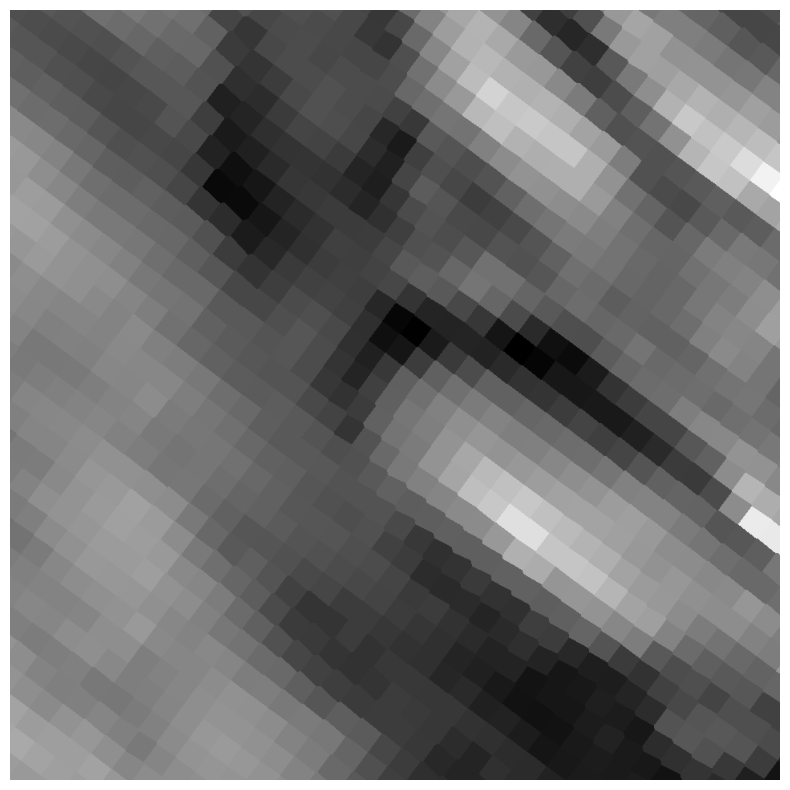

In [32]:
import importlib
importlib.reload(tbx)

tbx.plot_tiff_channel(raw_tiff, 26)


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


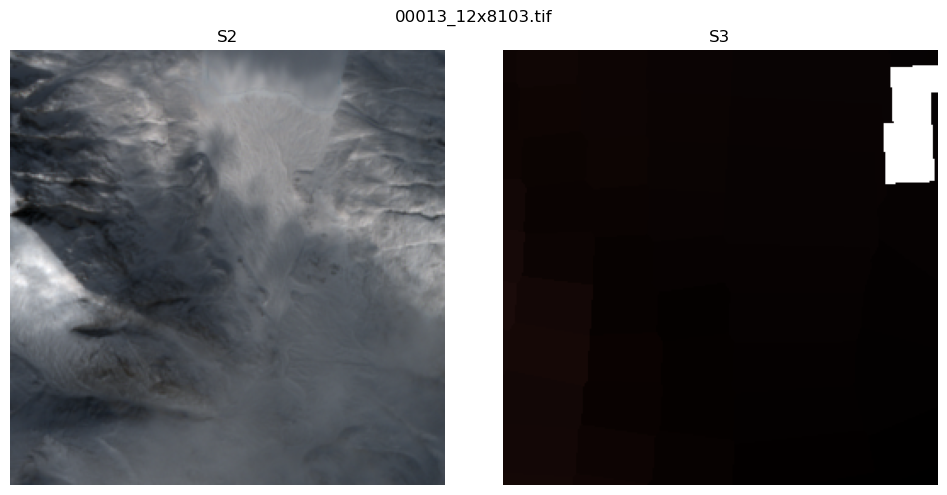

NotFoundError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} /home/cb/sis2/data/tfrecords256/00013_12x8103.tfrecord; No such file or directory [Op:IteratorGetNext]

In [142]:
import random
files = os.listdir('/home/cb/sis2/data/tif256/')
TIF_FILENAME = random.choice(files)
TENSOR_FILENAME = os.path.splitext(TIF_FILENAME)[0] + '.tfrecord'
raw_tiff = rasterio.open(os.path.join('/home/cb/sis2/data/tif256/', TIF_FILENAME))
# tfrecord = rasterio.open(os.path.join('/home/cb/sis2/data/tfrecords256/', TENSOR_FILENAME))
tbx.plot_tiff_sbs(raw_tiff, title=TIF_FILENAME)
sample_dataset = tf.data.TFRecordDataset(os.path.join('/home/cb/sis2/data/tfrecords256_train/', TENSOR_FILENAME))
for element in sample_dataset:
    print(element.shape)
    tbx.plot_tensor_sbs(element, TILESIZE, title=TENSOR_FILENAME)

In [6]:
# Only uncomment if file should be produced
# helper.save_tfrecord(raw_tiff, TENSOR_FILENAME)


#### Additional tests

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


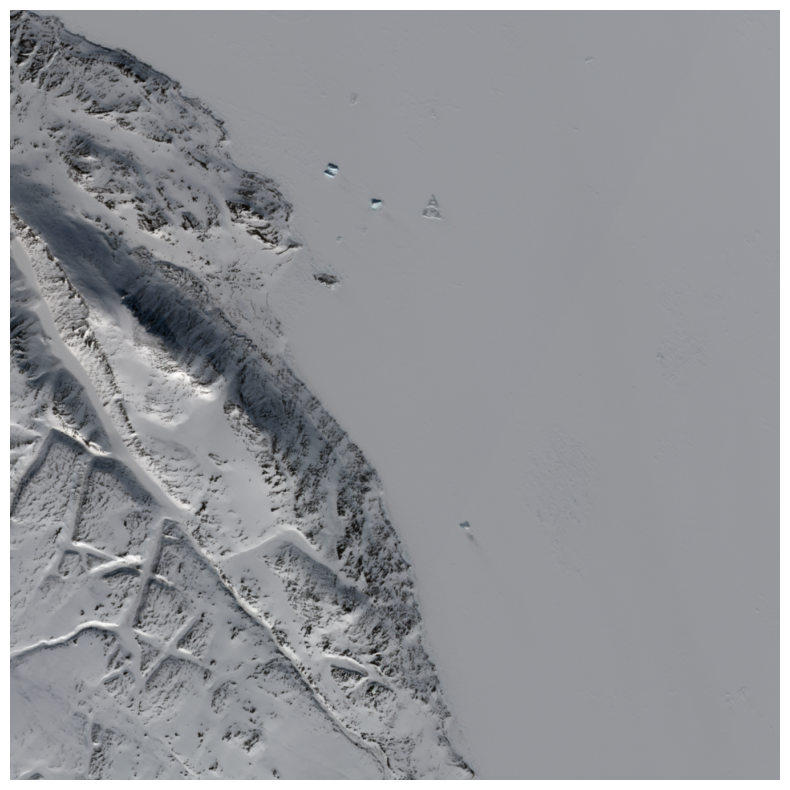

In [6]:
red_band = tbx.normalize_numpy(raw_tiff.read(5))
green_band = tbx.normalize_numpy(raw_tiff.read(4))
blue_band = tbx.normalize_numpy(raw_tiff.read(3))

# Stack the bands to create the RGB image
# rgb_image = rasterio.plot.reshape_as_image([red_band, green_band, blue_band])
rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

# Display the RGB image
plt.figure(figsize=(10,10))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()


In [56]:

raw_tiff = rasterio.open(os.path.join('/home/cb/sis2/data/curated/256/tif', '00089_7581x8886.tif'))
raw_np = np.transpose(raw_tiff.read(), (1, 2, 0))
raw_s2 = raw_np[:,:,2:5]


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


In [57]:
DOWNSAMPLE = 12

from skimage.measure import block_reduce
c1 = block_reduce(raw_s2[:,:,0], DOWNSAMPLE, np.mean)
c2 = block_reduce(raw_s2[:,:,1], DOWNSAMPLE, np.mean)
c3 = block_reduce(raw_s2[:,:,2], DOWNSAMPLE, np.mean)
downsampled_array = np.stack([c1, c2, c3], axis=2)
expanded_array = np.kron(downsampled_array, np.ones((DOWNSAMPLE, DOWNSAMPLE, 1)))
cropped_array = expanded_array[:256, :256, :]


In [68]:
writer = tf.io.TFRecordWriter('/home/cb/sis2/data/test.tfrecord')

sample = tf.train.Example(features=tf.train.Features(feature={
    'raw_s2': tf.train.Feature(float_list=tf.train.FloatList(value=raw_s2.flatten())),
    'raw_s2_alt': tf.train.Feature(float_list=tf.train.FloatList(value=cropped_array.flatten())),
}))

writer.write(sample.SerializeToString())
writer.close()



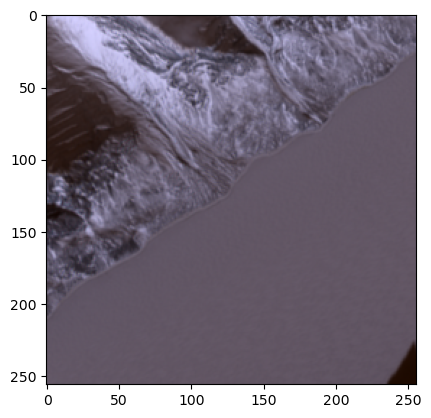

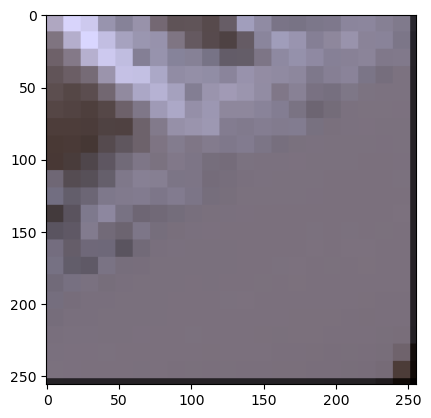

In [59]:
plt.imshow(tbx.normalize_numpy(raw_s2))
plt.show()
plt.imshow(tbx.normalize_numpy(cropped_array))
plt.show()